# Clustering and Cluster Validation

# DBSCAN (Density Based Spatial Clustering of Applications with Noise)

## Main Concept:
The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density.

To measure density of a region:
- __Density at a point P:__ Number of points within a circle of Radius Eps (ϵ) from point P.
- __Dense Region:__ For each point in the cluster, the circle with radius ϵ contains at least minimum number of points (MinPts).

The Epsilon neighborhood of a point P in the database D is defined as:

                            N (p) = {q ∈ D | dist(p, q) ≤ ϵ}

Following the definition of dense region, a point can be classified as a
1. __Core Point__ if |N (p)|≥ MinPts. The Core Points, as the name suggests, lie usually within the interior of a cluster. 
2. __Border Point__ has fewer than MinPts within its ϵ-neighborhood (N), but it lies in the neighborhood of another core point. 
3. __Noise__ is any data point that is neither core nor border point.

![image1.png](images/dbscan_points.png)


__Directly Density Reachable:__ Data-point a is directly density reachable from a point b if -
1. |N (b)|≥ MinPts; i.e. b is a core point.
2. a ∈ N(b) i.e. a is in the epsilon neighborhood of b.

Considering a border point and a core point, we can understand that notion of directly density reachable is not symmetric, because even though the core point falls in the epsilon neighborhood of border point, the border point doesn’t have enough MinPts, and thus fail to satisfy both conditions.

## Steps of DBSCAN Algorithm
1. The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the ϵ parameter.
2. If this point contains MinPts within ϵ neighborhood, cluster formation starts. Otherwise the point is labeled as noise. This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster. Concept of density reachable and density connected points are important here.
3. If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.
4. The above process continues until the density-connected cluster is completely found.
5. The process restarts with a new point which can be a part of a new cluster or labeled as noise.


### Libraries useful for DBSCAN

    To load dataset:    import pandas as pd
    Preprocessing:      from sklearn import preprocessing
    ploting graph:      import matplotlib.pyplot as plt
    numpy:              import numpy as np
    DBSCAN:             from sklearn.cluster import DBSCAN
    Agglomerative:      from sklearn.cluster import AgglomerativeClustering
    dendograms:         import scipy.cluster.hierarchy as shc
    for evaluations:    from sklearn import metrics
    plot the graph:     %matplotlib inline

In [13]:
#import libraries
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn import metrics

### Load the "s1_modified_labelled " data

In [4]:
#load the dataset
df = pd.read_csv("s1_modified_labelled.csv")
print(df)

          x       y  Class
0    844536  424646      0
1    870801  476330      0
2    878184  487392      0
3    846693  429031      0
4    777811  751059      0
..      ...     ...    ...
475  515612  540643      5
476  606548  574376      5
477  593490  623110      5
478  607084  595500      5
479  583728  563146      5

[480 rows x 3 columns]


### Q1. Perform pre-processing (if required)

In [1]:
# for s1_modified
#X = df.values[:, 0:2]
#Y = df.values[:, 2]
#scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
#X = scaler.fit_transform(X)
#print(X)
#print(Y)

### Q2. Apply DBSCAN Algorithm using Scikit-Learn taking eps=0.3 and mininimum samples = 50

In [10]:
dbscan = DBSCAN(eps = 0.3, min_samples = 50).fit(X)
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Q3. Plot the clusters.

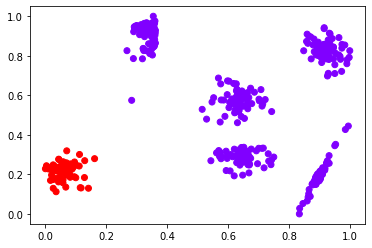

In [11]:
plt.scatter(X[:,0], X[:,1] ,
           c = dbscan.labels_, cmap ='rainbow')
plt.show()

# K-means Clustering

### Q4. Apply K-means with k=5

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter = 300, n_init = 10, random_state = 42).fit(X)

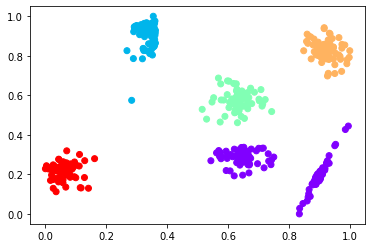

In [15]:
#Plot the clusters
plt.scatter(X[:,0], X[:,1] ,
           c = kmeans.labels_, cmap ='rainbow')
plt.show()

# Hierarchical Clustering

### Q5. Apply agglomerative clustering with single link and plot the clusters

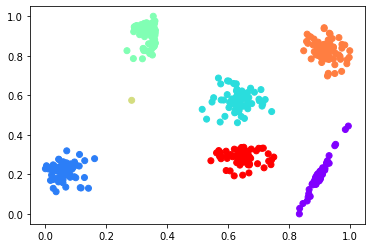

In [41]:
# single method linkage
singleAgg = AgglomerativeClustering(linkage = "single", n_clusters = 7).fit(X)
plt.scatter(X[:,0], X[:,1] ,
           c = singleAgg.labels_, cmap ='rainbow')
plt.show()

### Q6. Apply agglomerative clustering using wards method and plot their clusters

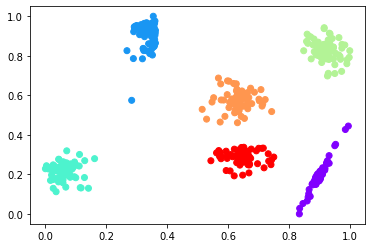

In [42]:
# wards method linkage
wardAgg = AgglomerativeClustering(linkage = "ward", n_clusters = 6).fit(X)
plt.scatter(X[:,0], X[:,1] ,
           c = wardAgg.labels_, cmap ='rainbow')
plt.show()

### Q7. Apply agglomerative clustering using complete link and plot their clusters

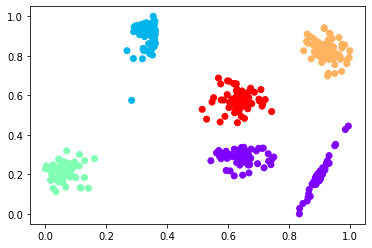

In [43]:
# complete linkage
compAgg = AgglomerativeClustering(linkage = "complete", n_clusters = 5).fit(X)
plt.scatter(X[:,0], X[:,1] ,
           c = compAgg.labels_, cmap ='rainbow')
plt.show()

### Q8. Find the number of clusters in each case.

In [37]:
# for most sensible results
# number of clusters are
# single linkage: 7
# ward linkage: 6
# complete linkage: 5

# Cluster Validation

### Q9. Calculate the silhouette score for each datapoint

In [2]:
#print(metrics.silhouette_samples(X, Y))

### Q10. Calculate the silhouette  score for each cluster in case of K-means, dbscan, single link, complete link and wards method

In [53]:
def clusterwise_score(nclusters, x, labels):
    silvalues = metrics.silhouette_samples(x, labels)
    cluster_sils = []
    for i in range(nclusters):
        cluster_sils.append(silvalues[labels == i].mean())
    return cluster_sils
        

print("K-means: ", clusterwise_score(5, X, kmeans.labels_), 
      "\nDB-scan: ", clusterwise_score(2, X, dbscan.labels_),
     "\nSingle link: ", clusterwise_score(7, X, singleAgg.labels_),
     "\nWard link: ", clusterwise_score(6, X, wardAgg.labels_),
     "\nComplete link: ", clusterwise_score(5, X, compAgg.labels_))

K-means:  [0.5162713587605671, 0.8400520628557636, 0.7867706364082244, 0.8077725813201685, 0.9094628191159881] 
DB-scan:  [0.4171299788957622, 0.9216859770364945] 
Single link:  [0.7662729267371037, 0.8542481569467485, 0.726730480495028, 0.8032646238953601, 0.0, 0.8077725813201685, 0.749859865712984] 
Ward link:  [0.7662729267371037, 0.8400520628557636, 0.8963251465001466, 0.8077725813201685, 0.7307240429034401, 0.749859865712984] 
Complete link:  [0.5162713587605671, 0.8400520628557636, 0.9094628191159881, 0.8077725813201685, 0.7867706364082244]


### Q11. Calculate the mean silhouette  score for all the clustering techniques mentioned in q10.

In [50]:
print("K-means: ", metrics.silhouette_score(X, kmeans.labels_), 
      "\nDB-scan: ", metrics.silhouette_score(X, dbscan.labels_),
     "\nSingle link: ", metrics.silhouette_score(X, singleAgg.labels_),
     "\nWard link: ", metrics.silhouette_score(X, wardAgg.labels_),
     "\nComplete link: ", metrics.silhouette_score(X, compAgg.labels_))

K-means:  0.7270042926822166 
DB-scan:  0.5012226452525509 
Single link:  0.782672140763258 
Ward link:  0.798155273883409 
Complete link:  0.7270042926822166


### Q12. Find the correlation between all the datapoints and plot a heat map for the same.

In [60]:
# take transpose of the dataframe
df_new = pd.DataFrame(data = np.hstack((X, Y.reshape(480, 1)))) # with preprocessed data
df_trans = df_new.transpose()

<AxesSubplot:>

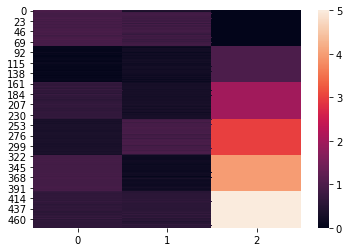

In [62]:
#import seaborn as sns
import seaborn as sns
sns.heatmap(df_new)

### Q13. Create the cluster membership matrix for the dbscan, k-means and agglomerative clustering. Compare it with the heat map.

<AxesSubplot:>

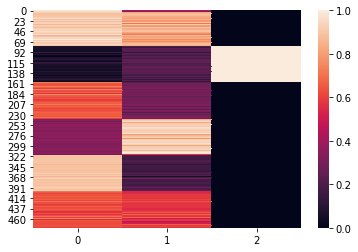

In [63]:
# dbscan
df_new = pd.DataFrame(data = np.hstack((X, dbscan.labels_.reshape(480, 1))))
sns.heatmap(df_new)

<AxesSubplot:>

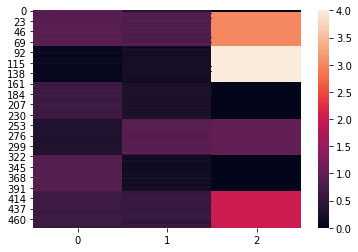

In [64]:
# kmeans
df_new = pd.DataFrame(data = np.hstack((X, kmeans.labels_.reshape(480, 1))))
sns.heatmap(df_new)

<AxesSubplot:>

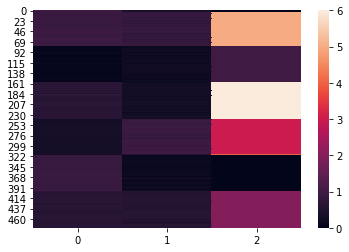

In [66]:
# single link
df_new = pd.DataFrame(data = np.hstack((X, singleAgg.labels_.reshape(480, 1))))
sns.heatmap(df_new)

### Q14. Calculate the rand index for all the clustering techniques. Which method has the highest rand index for the dataset.

In [71]:
print("K-means: ", metrics.adjusted_rand_score(Y, kmeans.labels_), 
      "\nDB-scan: ", metrics.adjusted_rand_score(Y, dbscan.labels_),
     "\nSingle link: ", metrics.adjusted_rand_score(Y, singleAgg.labels_),
     "\nWard link: ", metrics.adjusted_rand_score(Y, wardAgg.labels_),
     "\nComplete link: ", metrics.adjusted_rand_score(Y, compAgg.labels_))
# ward linkage method gives the highest rand index

K-means:  0.7970153470323807 
DB-scan:  0.14157706093189967 
Single link:  0.9777698734276323 
Ward link:  0.9803009740372722 
Complete link:  0.7970153470323807


### Q15. Plot the dendrograms for single link and wards method. Find the agglomerative level which gives the natural number of clusters

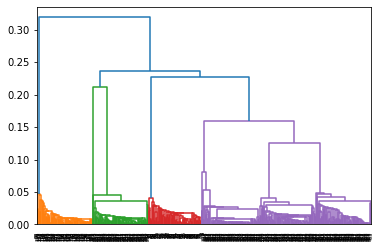

In [72]:
dn = shc.dendrogram(shc.linkage(X, "single"))

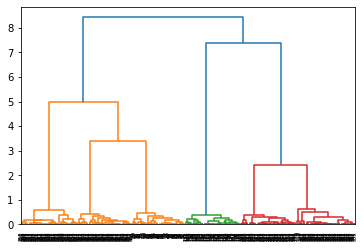

In [73]:
dn = shc.dendrogram(shc.linkage(X, "ward"))

In [74]:
# counting root as level 0
# single link: level 3 
# war link: level 2